In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


1. step: represents a unit of time where 1 step equals 1 hour
2. 
type: type of online transactio
3. 
amount: the amount of the transacti
4. n
nameOrig: customer starting the transact
5. on
oldbalanceOrg: balance before the transac
6. ion
newbalanceOrig: balance after the transa
7. tion
nameDest: recipient of the trans
8. ction
oldbalanceDest: initial balance of recipient before the tran
9. action
newbalanceDest: the new balance of recipient after the tra
10. saction
isFraud: fraud transactionansaction

In [4]:
data.shape

(6362620, 11)

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
type = data['type'].value_counts()
transactions = type.index
quantity = type.values

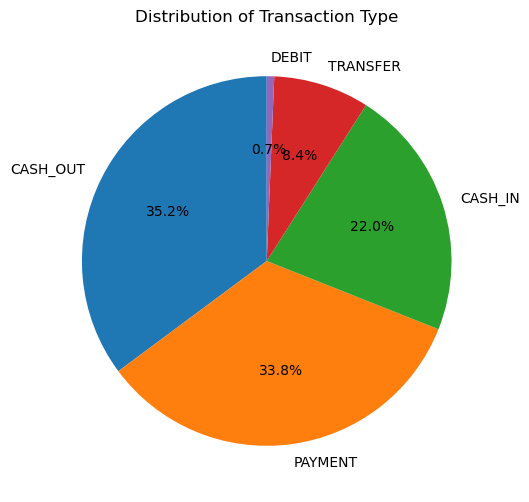

In [8]:
plt.figure(figsize=(8, 6))
plt.pie(quantity, labels=transactions, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Transaction Type")
plt.show()

In [9]:
correlation = data.corr()
print(correlation['isFraud'].sort_values(ascending=False))

C:\Users\Smile plz\AppData\Local\Temp\ipykernel_3976\2758495956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [10]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
data['type'] = data['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
data['isFraud'] = data['isFraud'].map({0:'No Fraud',1:'Fraud'})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
print("Accuracy :",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Accuracy : 0.9997060959164621
              precision    recall  f1-score   support

       Fraud       0.89      0.88      0.88      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [24]:
X = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
y = data[["isFraud"]]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
model2.score(X_test,y_test)

0.9997084534358488

In [28]:
features = [[4, 9000.60, 9000.60, 0.0]]
print(model2.predict(features))

['Fraud']


C:\Users\Smile plz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
